In [15]:
#Name :Bhakti Vinod Musmade
#PRN : 2301208019


In [16]:
#Import Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from datetime import timedelta

In [3]:
df = pd.read_csv(r"C:\Users\gadak\Downloads\dataset_DF_data - dataset_DF_data.csv")
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [4]:
df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [5]:
# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [6]:
# Aggregate sales by date
df = df.groupby('date')['sales'].sum().reset_index()

In [7]:
# Set the date column as the index
df.set_index('date', inplace=True)

In [8]:
# Apply STL decomposition (seasonal length is typically set based on domain knowledge)
stl = STL(df, seasonal=13)
result = stl.fit()

In [9]:
# Extract the decomposed components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

In [10]:
# Forecast future dates (for the next 30 days)
last_date = df.index[-1]
forecast_dates = [last_date + timedelta(days=i) for i in range(1, 31)]

In [11]:
# Simple extrapolation of trend (last known trend value for future dates)
trend_forecast = [trend[-1]] * 30

# Repeat the seasonal pattern (assuming a weekly or similar seasonal cycle)
seasonal_cycle = seasonal[-13:]  # Last full seasonal cycle
seasonal_forecast = list(seasonal_cycle) * 3  # Repeat it for 30 days


C:\Users\gadak\AppData\Local\Temp\ipykernel_1796\365368849.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trend_forecast = [trend[-1]] * 30


In [12]:
# Assume residuals have no systematic trend (set to zero for simplicity)
residual_forecast = [0] * 30

# Combine trend, seasonal, and residual forecasts
forecasted_values = np.array(trend_forecast) + np.array(seasonal_forecast[:30]) + np.array(residual_forecast)


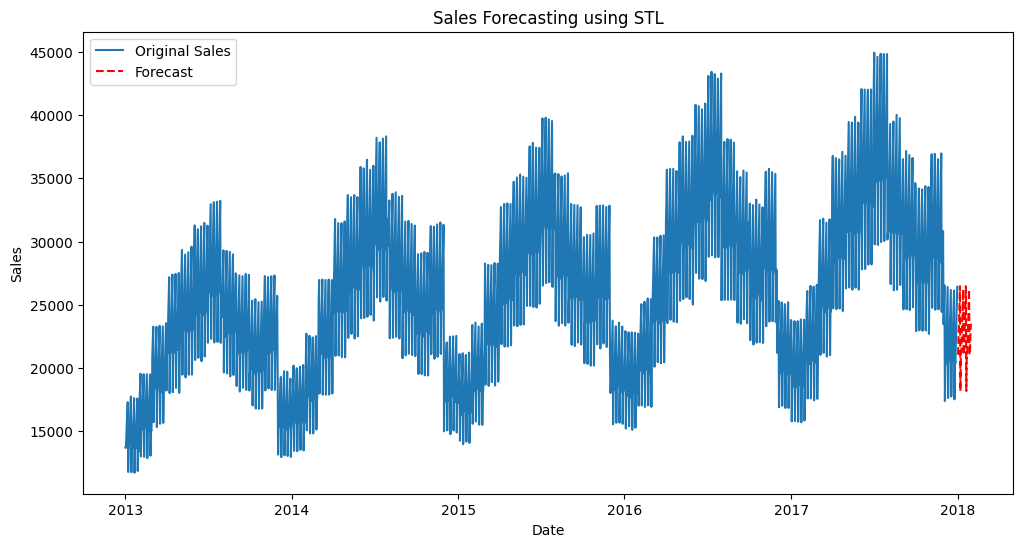

In [13]:
# Plot the original sales and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df, label='Original Sales')
plt.plot(forecast_dates, forecasted_values, label='Forecast', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecasting using STL')
plt.legend()
plt.show()